# Directed Null Model Generation

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import math

%matplotlib inline

In [3]:
G = nx.read_edgelist('largest_component_networkx_format.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

## Basic Features of this Network

In [4]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

in_degree = [G.in_degree(node) for node in G]
out_degree = [G.out_degree(node) for node in G]

kmin_in = min(in_degree)
kmax_in = max(in_degree)

kmin_out = min(out_degree)
kmax_out = max(out_degree)


In [5]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

print("Average in-degree ", np.mean(in_degree))
print()
print("Minimum in-degree: ", kmin_in)
print("Maximum in-degree: ", kmax_in)

print("Average out-degree ", np.mean(out_degree))
print()
print("Minimum out-degree: ", kmin_out)
print("Maximum out-degree: ", kmax_out)




Number of nodes:  8932
Number of edges:  14001

Average degree:  3.1350201522615317
Average degree (alternate calculation) 3.1350201522615317

Minimum degree:  1
Maximum degree:  381
Average in-degree  1.5675100761307659

Minimum in-degree:  0
Maximum in-degree:  378
Average out-degree  1.5675100761307659

Minimum out-degree:  0
Maximum out-degree:  105


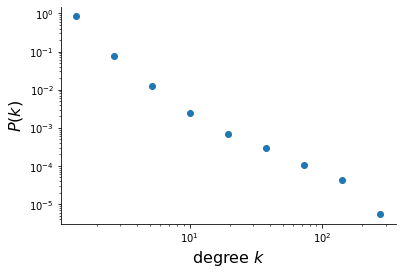

In [6]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

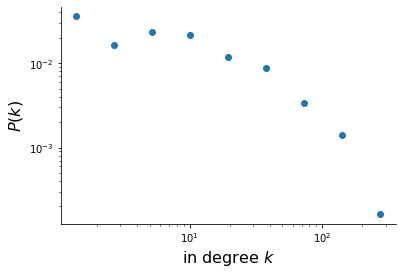

In [9]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
in_density, _ = np.histogram(in_degree, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x, in_density, marker='o', linestyle='none')
plt.xlabel(r"in degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

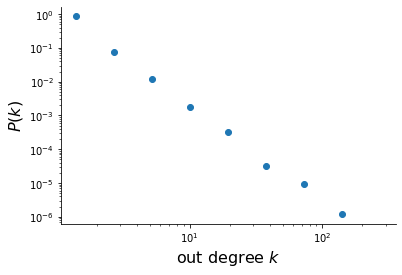

In [10]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
out_density, _ = np.histogram(out_degree, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x, out_density, marker='o', linestyle='none')
plt.xlabel(r"out degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [49]:
def persist_first_to_csv(centrality_dict, filename,columnname):
    curr = pd.DataFrame.from_dict(centrality_dict, orient="index", columns = [columnname])
    curr.to_csv(filename)
    
    
groupname = "RealNetwork"

clustering_filename = "{}_avg_clustering.csv".format(groupname)

apl_filename = "{}_apl.csv".format(groupname)

deg_cen_pd = "{}_deg_cen_df.csv".format(groupname)
in_deg_cen_pd = "{}_out_deg_cen_df.csv".format(groupname)
out_deg_cen_pd = "{}_in_deg_cen_df.csv".format(groupname)
eigenvector_cen_pd = "{}_eigenvector_cen_df.csv".format(groupname)
betweenness_cen_pd = "{}_betweenness_cen_df.csv".format(groupname)    
clustering_pd = "{}_clustering_df.csv".format(groupname)

filename = "RealNetwork"
G = nx.read_edgelist("largest_component_networkx_format.csv", comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')
print(nx.average_shortest_path_length(G))
print(nx.average_clustering(G))

persist_first_to_csv(nx.clustering(G),clustering_pd,filename)
persist_first_to_csv(nx.degree_centrality(G),deg_cen_pd,filename)
persist_first_to_csv(nx.in_degree_centrality(G),in_deg_cen_pd,filename)
persist_first_to_csv(nx.out_degree_centrality(G),out_deg_cen_pd,filename)
persist_first_to_csv(nx.eigenvector_centrality(G),eigenvector_cen_pd,filename)
persist_first_to_csv(nx.betweenness_centrality(G,k=None, normalized=True),betweenness_cen_pd,filename)

0.0012293584044826328
0.009608690028807564


In [11]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

https://stackoverflow.com/questions/53958700/plotting-the-degree-distribution-of-a-graph-using-nx-degree-histogram

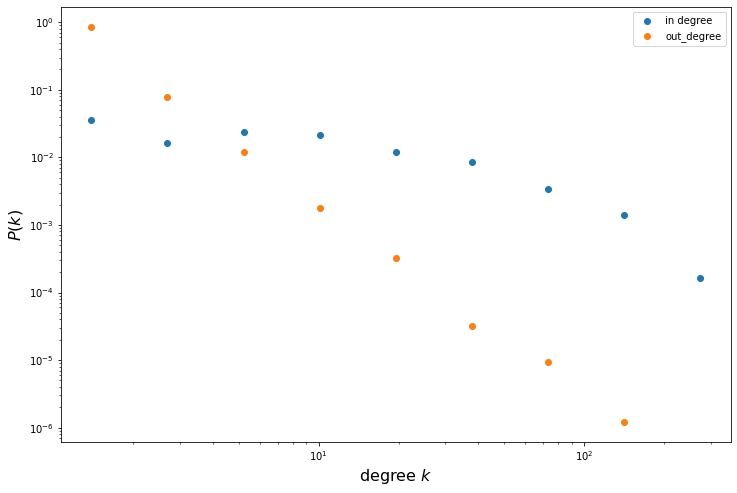

In [13]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(x, in_density, marker='o', linestyle='none', label="in degree") 
plt.loglog(x, out_density, marker='o', linestyle='none', label = "out_degree")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


plt.legend(loc="upper right")

In [20]:
print(nx.average_shortest_path_length(G))

0.0012293584044826328


In [21]:
print(nx.average_clustering(G))

0.009608690028807564


# Plotting Betweenness 

In [55]:
betweenness = betweenness.set_index("Unnamed: 0")

In [56]:
betweenness


,Directed_Unweighted_Random_Null_Model_0,Directed_Unweighted_Random_Null_Model_1,Directed_Unweighted_Random_Null_Model_2,Directed_Unweighted_Random_Null_Model_3
Unnamed: 0,,,,
1385933370090209280,0.0,0.0,0.0,0.0
20139753,0.0,0.0,0.0,0.0
1416535505454338050,0.0,0.0,0.0,0.0
23491400,0.0,0.0,0.0,0.0
1319298517,0.0,0.0,0.0,0.0
...,...,...,...,...
77596220,0.0,0.0,0.0,0.0
891058415195303939,0.0,0.0,0.0,0.0
1095768409449459712,0.0,0.0,0.0,0.0


In [57]:
betweenness['average'] = betweenness.mean(axis=1)

In [58]:
deg_dict = dict(G.degree)

In [59]:
deg_dict


{1385933370090209280: 1,
 158095776: 18,
 1416535505454338050: 2,
 1604931252: 39,
 544695802: 1,
 716257068538327040: 1,
 258170457: 2,
 1086084557009575936: 80,
 2817389862: 1,
 822476228548403200: 1,
 2353730881: 1,
 921026239808208896: 1,
 720934098223542272: 1,
 2922779039: 1,
 552891173: 1,
 982496635: 1,
 1433403537329819654: 1,
 1175052073605353473: 1,
 2784661153: 1,
 102887506: 1,
 18681111: 46,
 952980338745147394: 1,
 1438871779779530755: 1,
 46975259: 1,
 1157395568135557120: 2,
 21951711: 115,
 563064119: 3,
 277332906: 178,
 158458133: 129,
 979827806023618560: 1,
 18308257: 1,
 846667915: 1,
 258916078: 1,
 1138564320390836224: 1,
 17912334: 1,
 2821464243: 1,
 928790819145842688: 1,
 753638148958216192: 1,
 2256955027: 1,
 1185936230393024512: 2,
 14079041: 326,
 3021899490: 1,
 13880132: 1,
 960624707820113920: 1,
 52003137: 1,
 1887595058: 1,
 331864347: 1,
 961514730: 1,
 70750793: 1,
 155629527: 1,
 1161351506983038976: 1,
 766360387: 1,
 150270263: 31,
 38471212: 

In [60]:
degrees = pd.DataFrame.from_dict(deg_dict, orient="index", columns = ["degree"])

In [61]:
degrees

,degree
1385933370090209280,1
158095776,18
1416535505454338050,2
1604931252,39
544695802,1
...,...
77596220,1
891058415195303939,1
1095768409449459712,1
881426857,1


Join this with the betweenness 


In [62]:
betweenness = pd.merge(betweenness, degrees, left_index=True, right_index=True)

In [63]:
betweenness

,Directed_Unweighted_Random_Null_Model_0,Directed_Unweighted_Random_Null_Model_1,Directed_Unweighted_Random_Null_Model_2,Directed_Unweighted_Random_Null_Model_3,average,degree
1385933370090209280,0.0,0.0,0.0,0.0,0.0,1
20139753,0.0,0.0,0.0,0.0,0.0,59
1416535505454338050,0.0,0.0,0.0,0.0,0.0,2
23491400,0.0,0.0,0.0,0.0,0.0,123
1319298517,0.0,0.0,0.0,0.0,0.0,15
...,...,...,...,...,...,...
77596220,0.0,0.0,0.0,0.0,0.0,1
891058415195303939,0.0,0.0,0.0,0.0,0.0,1
1095768409449459712,0.0,0.0,0.0,0.0,0.0,1
881426857,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='degree', ylabel='average'>

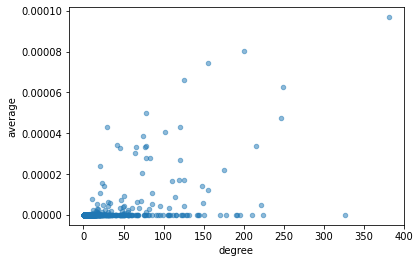

In [64]:
betweenness.plot.scatter(x="degree", y="average", alpha=0.5)

In [65]:
real_betweenness = pd.read_csv('RealNetwork_betweenness_cen_df.csv')

In [66]:
real_betweenness.head()

,Unnamed: 0,RealNetwork
0,1385933370090209280,0.0
1,158095776,0.0
2,1416535505454338050,0.0
3,1604931252,0.0
4,544695802,0.0


In [67]:
real_betweenness = real_betweenness.set_index("Unnamed: 0")

In [68]:
real_betweenness = pd.merge(real_betweenness, degrees, left_index=True, right_index=True)

In [69]:
real_betweenness


,RealNetwork,degree
1385933370090209280,0.0,1
158095776,0.0,18
1416535505454338050,0.0,2
1604931252,0.0,39
544695802,0.0,1
...,...,...
77596220,0.0,1
891058415195303939,0.0,1
1095768409449459712,0.0,1
881426857,0.0,1


<AxesSubplot:xlabel='degree', ylabel='RealNetwork'>

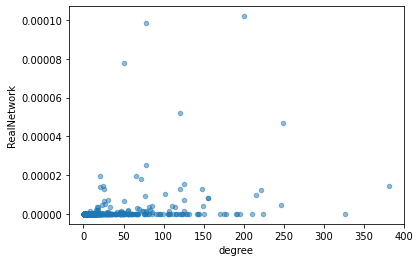

In [71]:
real_betweenness.plot.scatter(x="degree", y="RealNetwork", alpha=0.5)

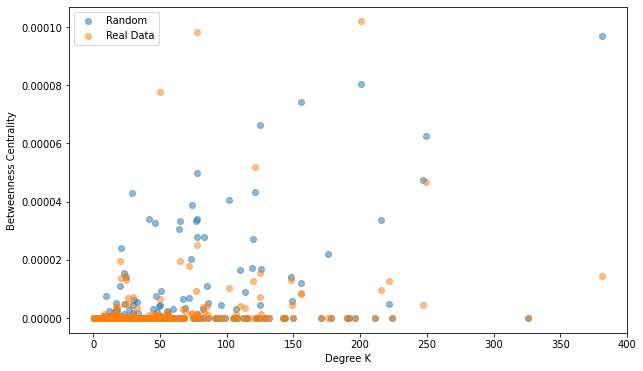

In [81]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = betweenness ['degree'], y = betweenness ['average'],  label = "Random", alpha = 0.5)
ax.scatter(x = real_betweenness['degree'], y = real_betweenness['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Betweenness Centrality")
plt.legend(loc="upper left")

https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib

https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/

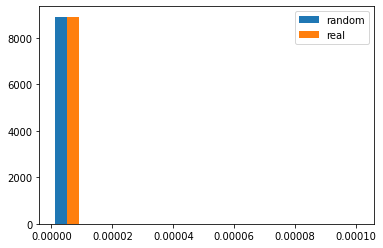

In [76]:
plt.hist([betweenness ['average'], real_betweenness['RealNetwork']],label=['random', 'real'])
plt.legend(loc='upper right')
plt.show()

In [95]:
betweenness = pd.read_csv('TestGroup_betweenness_cen_df.csv')

all_betweenness_files = ['done_1_group_betweenness_cen_df.csv', 'Group1_5_2_betweenness_cen_df.csv', 'Group1_5_3_betweenness_cen_df.csv', 'Group1_5_betweenness_cen_df.csv','Group1_betweenness_cen_df.csv', 'Group2_betweenness_cen_df.csv', 'Group3_betweenness_cen_df.csv', 'Group4_betweenness_cen_df.csv', 'Group5_betweenness_cen_df.csv','Group2_1_betweenness_cen_df.csv']
all_betweenness_dfs = []
for file in all_betweenness_files:
    all_betweenness_dfs.append(pd.read_csv(file))

for df in all_betweenness_dfs:
    df = df.set_index("Unnamed: 0")
    real_betweenness = pd.merge(real_betweenness, df, left_index=True, right_index=True)

In [96]:
real_betweenness


,RealNetwork,degree,Directed_Unweighted_Random_Null_Model_0_x,Directed_Unweighted_Random_Null_Model_1_x,Directed_Unweighted_Random_Null_Model_10_x,Directed_Unweighted_Random_Null_Model_11_x,Directed_Unweighted_Random_Null_Model_12_x,Directed_Unweighted_Random_Null_Model_13_x,Directed_Unweighted_Random_Null_Model_14_x,Directed_Unweighted_Random_Null_Model_15_x,...,Directed_Unweighted_Random_Null_Model_590,Directed_Unweighted_Random_Null_Model_591,Directed_Unweighted_Random_Null_Model_592,Directed_Unweighted_Random_Null_Model_593,Directed_Unweighted_Random_Null_Model_594,Directed_Unweighted_Random_Null_Model_595,Directed_Unweighted_Random_Null_Model_596,Directed_Unweighted_Random_Null_Model_597,Directed_Unweighted_Random_Null_Model_598,Directed_Unweighted_Random_Null_Model_599
1385933370090209280,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158095776,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416535505454338050,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604931252,0.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544695802,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77596220,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
891058415195303939,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095768409449459712,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881426857,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
random_betweenness = real_betweenness.drop('RealNetwork',axis = 1)

In [90]:
random_betweenness


,degree,Directed_Unweighted_Random_Null_Model_0,Directed_Unweighted_Random_Null_Model_1,Directed_Unweighted_Random_Null_Model_10,Directed_Unweighted_Random_Null_Model_11,Directed_Unweighted_Random_Null_Model_12,Directed_Unweighted_Random_Null_Model_13,Directed_Unweighted_Random_Null_Model_14,Directed_Unweighted_Random_Null_Model_15,Directed_Unweighted_Random_Null_Model_16,...,Directed_Unweighted_Random_Null_Model_2240,Directed_Unweighted_Random_Null_Model_2241,Directed_Unweighted_Random_Null_Model_2242,Directed_Unweighted_Random_Null_Model_2243,Directed_Unweighted_Random_Null_Model_2244,Directed_Unweighted_Random_Null_Model_2245,Directed_Unweighted_Random_Null_Model_2246,Directed_Unweighted_Random_Null_Model_2247,Directed_Unweighted_Random_Null_Model_2248,Directed_Unweighted_Random_Null_Model_2249
1385933370090209280,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158095776,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416535505454338050,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604931252,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544695802,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77596220,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
891058415195303939,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095768409449459712,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881426857,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
random_betweenness['average_node_betweenness'] = random_betweenness.mean(axis=1)

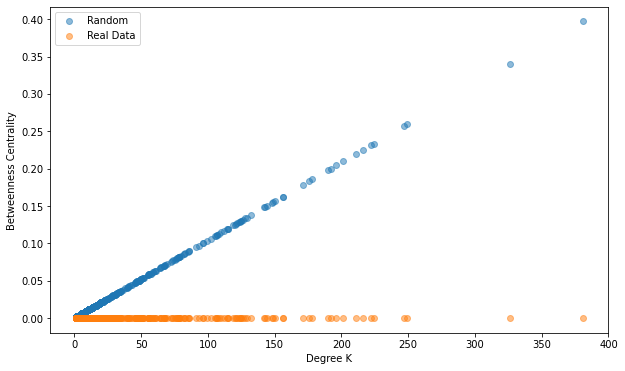

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_betweenness['degree'], y = random_betweenness ['average_node_betweenness'],  label = "Random", alpha = 0.5)
ax.scatter(x = real_betweenness['degree'], y = real_betweenness['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Betweenness Centrality")
plt.legend(loc="upper left")

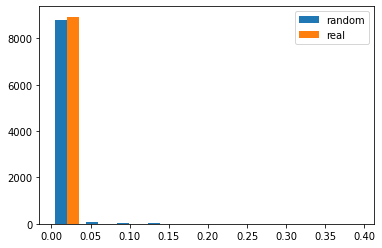

In [94]:
plt.hist([random_betweenness['average_node_betweenness'], real_betweenness['RealNetwork']],label=['random', 'real'])
plt.legend(loc='upper right')
plt.show()

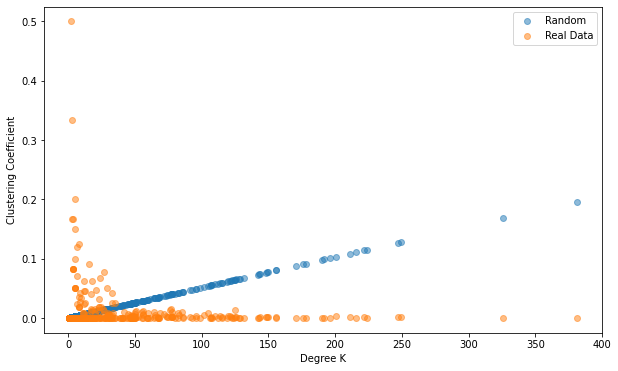

In [104]:
real = pd.read_csv('RealNetwork_clustering_df.csv')
real = real.set_index("Unnamed: 0")

real = pd.merge(real, degrees, left_index=True, right_index=True)
all_files = ['done_1_group_clustering_df.csv', 'Group1_5_2_clustering_df.csv', 'Group1_5_3_clustering_df.csv', 'Group1_5_clustering_df.csv','Group1_clustering_df.csv', 'Group2_clustering_df.csv',
                         'Group3_clustering_df.csv', 'Group4_clustering_df.csv', 'Group5_clustering_df.csv','Group2_1_clustering_df.csv']
all_dfs = []
for file in all_files:
    all_dfs.append(pd.read_csv(file))

for df in all_dfs:
    df = df.set_index("Unnamed: 0")
    real = pd.merge(real, df, left_index=True, right_index=True)
    
    
random_df = real_betweenness.drop('RealNetwork',axis = 1)

random_df['average_node_clustering'] = random_df.mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_df['degree'], y = random_df ['average_node_clustering'],  label = "Random", alpha = 0.5)
ax.scatter(x = real['degree'], y = real['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Clustering Coefficient")
plt.legend(loc="upper right")

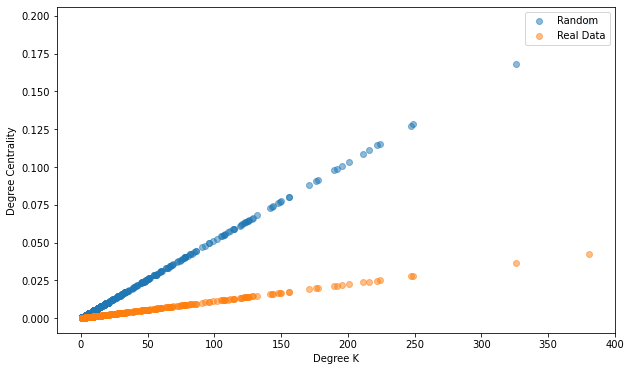

In [105]:
real = pd.read_csv('RealNetwork_deg_cen_df.csv')
real = real.set_index("Unnamed: 0")

real = pd.merge(real, degrees, left_index=True, right_index=True)
all_files = ['done_1_group_deg_cen_df.csv', 'Group1_5_2_deg_cen_df.csv', 'Group1_5_3_deg_cen_df.csv', 'Group1_5_deg_cen_df.csv','Group1_deg_cen_df.csv', 'Group2_deg_cen_df.csv',
                         'Group3_deg_cen_df.csv', 'Group4_deg_cen_df.csv', 'Group5_deg_cen_df.csv','Group2_1_deg_cen_df.csv']
all_dfs = []
for file in all_files:
    all_dfs.append(pd.read_csv(file))

for df in all_dfs:
    df = df.set_index("Unnamed: 0")
    real = pd.merge(real, df, left_index=True, right_index=True)
    
    
random_df = real_betweenness.drop('RealNetwork',axis = 1)

random_df['average_node_deg_cen'] = random_df.mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_df['degree'], y = random_df ['average_node_deg_cen'],  label = "Random", alpha = 0.5)
ax.scatter(x = real['degree'], y = real['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Degree Centrality")
plt.legend(loc="upper right")

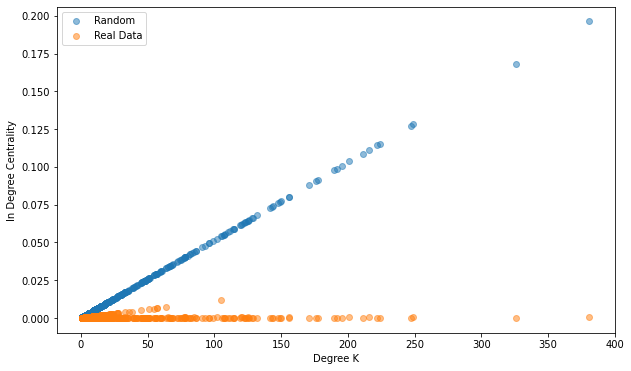

In [123]:
real = pd.read_csv('RealNetwork_in_deg_cen_df.csv')
real = real.set_index("Unnamed: 0")

real = pd.merge(real, degrees, left_index=True, right_index=True)
all_files = ['done_1_group_in_deg_cen_df.csv', 'Group1_5_2_in_deg_cen_df.csv', 'Group1_5_3_in_deg_cen_df.csv', 'Group1_5_in_deg_cen_df.csv','Group1_in_deg_cen_df.csv', 'Group2_in_deg_cen_df.csv',
                         'Group3_in_deg_cen_df.csv', 'Group4_in_deg_cen_df.csv', 'Group5_in_deg_cen_df.csv','Group2_1_in_deg_cen_df.csv']
all_dfs = []
for file in all_files:
    all_dfs.append(pd.read_csv(file))

for df in all_dfs:
    df = df.set_index("Unnamed: 0")
    real = pd.merge(real, df, left_index=True, right_index=True)
    
    
random_df = real_betweenness.drop('RealNetwork',axis = 1)

random_df['average_node_in_deg_cen'] = random_df.mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_df['degree'], y = random_df ['average_node_in_deg_cen'],  label = "Random", alpha = 0.5)
ax.scatter(x = real['degree'], y = real['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("In Degree Centrality")
plt.legend(loc="upper left")

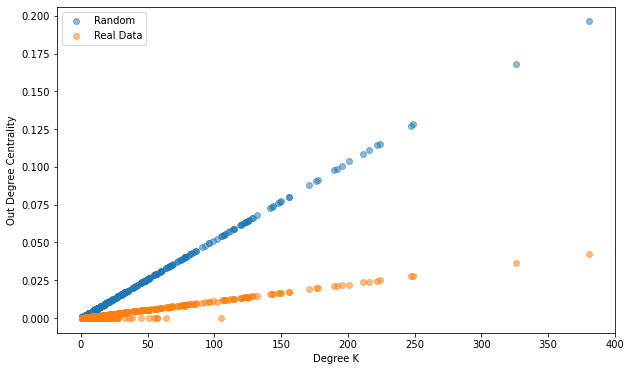

In [122]:
real = pd.read_csv('RealNetwork_out_deg_cen_df.csv')
real = real.set_index("Unnamed: 0")

real = pd.merge(real, degrees, left_index=True, right_index=True)
all_files = ['done_1_group_out_deg_cen_df.csv', 'Group1_5_2_out_deg_cen_df.csv', 'Group1_5_3_out_deg_cen_df.csv', 'Group1_5_out_deg_cen_df.csv','Group1_out_deg_cen_df.csv', 'Group2_out_deg_cen_df.csv',
                         'Group3_out_deg_cen_df.csv', 'Group4_out_deg_cen_df.csv', 'Group5_out_deg_cen_df.csv','Group2_1_out_deg_cen_df.csv']
all_dfs = []
for file in all_files:
    all_dfs.append(pd.read_csv(file))

for df in all_dfs:
    df = df.set_index("Unnamed: 0")
    real = pd.merge(real, df, left_index=True, right_index=True)
    
    
random_df = real_betweenness.drop('RealNetwork',axis = 1)

random_df['average_node_out_deg_cen'] = random_df.mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_df['degree'], y = random_df ['average_node_out_deg_cen'],  label = "Random", alpha = 0.5)
ax.scatter(x = real['degree'], y = real['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Out Degree Centrality")
plt.legend(loc="upper left")

# Calculating average and variance of APL & Avg Clustering

In [110]:
nx.average_clustering(G)

0.009608690028807564

In [111]:
nx.average_shortest_path_length(G)

0.0012293584044826328

In [118]:
import numpy
all_files = ['done_1_group_avg_clustering.csv', 'Group1_5_2_avg_clustering.csv', 'Group1_5_3_avg_clustering.csv', 'Group1_5_avg_clustering.csv','Group1_avg_clustering.csv', 'Group2_avg_clustering.csv',
                         'Group3_avg_clustering.csv', 'Group4_avg_clustering.csv', 'Group5_avg_clustering.csv','Group2_1_avg_clustering.csv']
clustering_vals = []
for file in all_files:
    f = open(file, "r")
    clustering_vals.extend(f.readlines())

for i in range(len(clustering_vals)):
    clustering_vals[i] = float(clustering_vals[i])
    
arr = numpy.array(clustering_vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))

    

Mean: 0.0015353677169915292
Variance: 0.000249374514531429


In [120]:
import numpy
all_files = ['done_1_group_apl.csv', 'Group1_5_2_apl.csv', 'Group1_5_3_apl.csv', 'Group1_5_apl.csv','Group1_apl.csv', 'Group2_apl.csv',
                         'Group3_apl.csv', 'Group4_apl.csv', 'Group5_apl.csv','Group2_1_apl.csv']
clustering_vals = []
for file in all_files:
    f = open(file, "r")
    clustering_vals.extend(f.readlines())

for i in range(len(clustering_vals)):
    clustering_vals[i] = float(clustering_vals[i])
    
arr = numpy.array(clustering_vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))

Mean: 0.0022713051226608914
Variance: 0.0012935149778012822
